In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv("Resources/electricity_prices.csv")

C:\Users\Aidan\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3186: DtypeWarning: Columns (9,10,11,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
df

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,2011-11-01 00:00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,2013-12-31 21:30:00,New Year's Eve,1,1,1,31,12,2013,43,1179.14,3932.22,34.51,6.0,22.2,285.31,812.0,3692.95,42.45
38010,2013-12-31 22:00:00,New Year's Eve,1,1,1,31,12,2013,44,1152.01,3821.44,33.83,5.0,24.1,278.31,852.0,3571.00,33.83
38011,2013-12-31 22:30:00,New Year's Eve,1,1,1,31,12,2013,45,1123.67,3724.21,31.75,4.0,20.4,280.91,962.0,3460.29,31.75
38012,2013-12-31 23:00:00,New Year's Eve,1,1,1,31,12,2013,46,1094.24,3638.16,33.83,5.0,14.8,302.46,950.0,3563.99,50.60


In [4]:
#Checking Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [5]:
#Convert to numeric data type and convert values that return errors to NAN
df['ForecastWindProduction'] = pd.to_numeric(df['ForecastWindProduction'], errors='coerce')
df['SystemLoadEA'] = pd.to_numeric(df['SystemLoadEA'], errors='coerce')
df['SMPEA'] = pd.to_numeric(df['SMPEA'], errors='coerce')
df['ORKTemperature'] = pd.to_numeric(df['ORKTemperature'], errors='coerce')
df['ORKWindspeed'] = pd.to_numeric(df['ORKWindspeed'], errors='coerce')
df['CO2Intensity'] = pd.to_numeric(df['CO2Intensity'], errors='coerce')
df['ActualWindProduction'] = pd.to_numeric(df['ActualWindProduction'], errors='coerce')
df['SystemLoadEP2'] = pd.to_numeric(df['SystemLoadEP2'], errors='coerce')
df['SMPEP2'] = pd.to_numeric(df['SMPEP2'], errors='coerce')

In [6]:
#Convert DateTime to datetime dtype
df['DateTime']=pd.to_datetime(df['DateTime'],dayfirst=True)

In [7]:
#Confirming Dtypes have changed to float
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DateTime                38014 non-null  datetime64[ns]
 1   Holiday                 38014 non-null  object        
 2   HolidayFlag             38014 non-null  int64         
 3   DayOfWeek               38014 non-null  int64         
 4   WeekOfYear              38014 non-null  int64         
 5   Day                     38014 non-null  int64         
 6   Month                   38014 non-null  int64         
 7   Year                    38014 non-null  int64         
 8   PeriodOfDay             38014 non-null  int64         
 9   ForecastWindProduction  38009 non-null  float64       
 10  SystemLoadEA            38012 non-null  float64       
 11  SMPEA                   38012 non-null  float64       
 12  ORKTemperature          37719 non-null  float6

In [8]:
df.isnull().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df_cleaned = df.rename(columns={"DateTime":"Date", "PeriodOfDay":"HalfHourPeriod", "SystemLoadEA":"NationalLoadForecast",\
                               "SMPEA":"PriceForecast$", "ORKTemperature":"Temperature C", "ORKWindspeed": "Windspeed km/h", "CO2Intensity":"CO2Intensity g/kWh",\
                               "ActualWindProduction":"WindProduction MWh", "SystemLoadEP2":"NationalSystemLoad MWh", "SMPEP2":"Price $"})

In [11]:
df_cleaned.head()

,Date,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,Temperature C,Windspeed km/h,CO2Intensity g/kWh,WindProduction MWh,NationalSystemLoad MWh,Price $
0,2011-11-01 00:00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [12]:
df_cleaned.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,Temperature C,Windspeed km/h,CO2Intensity g/kWh,WindProduction MWh,NationalSystemLoad MWh,Price $
count,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000
mean,0.037578,2.998355,28.044584,15.707181,6.886789,2012.386577,23.508651,542.871513,4020.753657,62.747428,9.628443,19.209721,479.519761,519.814951,3787.560062,64.181344
std,0.190175,1.998845,15.552428,8.804424,3.566915,0.623780,13.854822,413.725304,860.148265,32.300069,4.439757,9.569069,85.170896,377.879680,842.544909,35.432265
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,14.000000,8.000000,4.000000,2012.000000,12.000000,188.927500,3281.780000,45.540000,6.000000,13.000000,421.275000,198.000000,3060.215000,45.800000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,440.645000,4105.530000,55.230000,9.000000,18.500000,480.350000,444.000000,3867.220000,55.560000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,36.000000,837.182500,4638.982500,70.320000,13.000000,24.100000,537.540000,792.000000,4427.822500,72.120000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


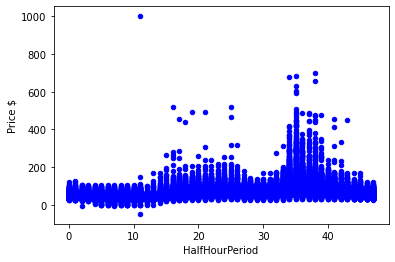

In [13]:
#Checking for price outliers
df_cleaned.plot.scatter(x='HalfHourPeriod',
                     y='Price $',
                      c='blue')
plt.show()

In [14]:
df_cleaned.sort_values("Price $").head(5)

,Date,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,Temperature C,Windspeed km/h,CO2Intensity g/kWh,WindProduction MWh,NationalSystemLoad MWh,Price $
3131,2012-01-05 05:30:00,None,0,3,1,5,1,2012,11,1330.38,3003.79,24.54,11.0,37.0,366.69,965.0,2859.16,-47.74
19877,2012-12-19 03:30:00,None,0,2,51,19,12,2012,7,1484.30,3268.00,32.25,9.0,50.0,332.77,1310.0,2799.06,-3.50
19872,2012-12-19 01:00:00,None,0,2,51,19,12,2012,2,1510.70,3641.18,37.04,9.0,46.3,320.98,1476.0,3170.77,-3.50
3609,2012-01-15 04:30:00,None,0,6,2,15,1,2012,9,1066.10,3057.07,41.00,6.0,31.5,370.98,827.0,2620.02,0.00
391,2011-11-09 03:30:00,None,0,2,45,9,11,2011,7,839.80,2965.40,31.82,11.0,13.0,423.22,720.0,2723.30,0.00


In [15]:
df_cleaned.sort_values("Price $").tail(5)

,Date,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,Temperature C,Windspeed km/h,CO2Intensity g/kWh,WindProduction MWh,NationalSystemLoad MWh,Price $
16884,2012-10-17 19:00:00,None,0,2,42,17,10,2012,38,500.30,5412.97,473.82,10.0,29.6,510.96,419.0,5159.27,657.08
8432,2012-04-24 17:00:00,None,0,1,17,24,4,2012,34,55.40,4866.69,113.29,6.0,9.3,569.75,144.0,4757.36,675.58
35697,2013-11-13 17:30:00,None,0,2,46,13,11,2013,35,1491.11,5820.16,88.70,9.0,25.9,291.54,1479.0,5496.03,682.85
23844,2013-03-11 19:00:00,None,0,0,11,11,3,2013,38,983.10,5878.00,319.19,-1.0,27.8,414.26,769.0,5550.64,699.49
23193,2013-02-26 05:30:00,None,0,1,9,26,2,2013,11,142.80,3370.41,44.18,1.0,13.0,580.92,86.0,3304.05,1000.00


In [24]:
#Removing invalid prices and outliers
df_reduced = df_cleaned.loc[(df_cleaned["Price $"] >= 0) & (df_cleaned["Price $"] <100)]


In [17]:
df_final = df_reduced.drop("Holiday", axis=1)
df_final.head()                

,Date,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,PriceForecast$,Temperature C,Windspeed km/h,CO2Intensity g/kWh,WindProduction MWh,NationalSystemLoad MWh,Price $
0,2011-11-01 00:00:00,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.0,9.3,600.71,356.0,3159.60,54.32
1,2011-11-01 00:30:00,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.0,11.1,605.42,317.0,2973.01,54.23
2,2011-11-01 01:00:00,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.0,11.1,589.97,311.0,2834.00,54.23
3,2011-11-01 01:30:00,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.0,9.3,585.94,313.0,2725.99,53.47
4,2011-11-01 02:00:00,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.0,11.1,571.52,346.0,2655.64,39.87


In [25]:
#One hot encoding to convert categorical holiday data to dummy variables
df_dummies = pd.get_dummies(df_reduced, drop_first=True)

In [190]:
df_final.to_csv("Resources/electricity_cleaned.csv")

In [ ]:
df_dummies.to_csv("Resources/electricity_ml.csv")

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [26]:
X = df_dummies.drop(["Price $","Date"], axis=1)
y = df_dummies["Price $"]

In [27]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()   

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [30]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.4603400079484731
Test Score: 0.447445249052127

Model: KNeighborsRegressor
Train score: 0.9006028392990568
Test Score: 0.8163841404850398

Model: RandomForestRegressor
Train score: 0.9746820130413446
Test Score: 0.8048307413397228

Model: ExtraTreesRegressor
Train score: 0.9999999992737449
Test Score: 0.8616203518024823

Model: AdaBoostRegressor
Train score: 0.23281292464784265
Test Score: 0.21943631887293558

Model: SVR
Train score: 0.5324889147413248
Test Score: 0.5077876158801078



In [29]:
df_dummies

,Date,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,HalfHourPeriod,ForecastWindProduction,NationalLoadForecast,...,Holiday_Good Friday,Holiday_Holy Saturday,Holiday_June Bank Holiday,Holiday_May Day,Holiday_New Year's Day,Holiday_New Year's Eve,Holiday_None,Holiday_October Bank Holiday,Holiday_St Patrick's Day,Holiday_St Stephen's Day
0,2011-11-01 00:00:00,0,1,44,1,11,2011,0,315.31,3388.77,...,0,0,0,0,0,0,1,0,0,0
1,2011-11-01 00:30:00,0,1,44,1,11,2011,1,321.80,3196.66,...,0,0,0,0,0,0,1,0,0,0
2,2011-11-01 01:00:00,0,1,44,1,11,2011,2,328.57,3060.71,...,0,0,0,0,0,0,1,0,0,0
3,2011-11-01 01:30:00,0,1,44,1,11,2011,3,335.60,2945.56,...,0,0,0,0,0,0,1,0,0,0
4,2011-11-01 02:00:00,0,1,44,1,11,2011,4,342.90,2849.34,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38009,2013-12-31 21:30:00,1,1,1,31,12,2013,43,1179.14,3932.22,...,0,0,0,0,0,1,0,0,0,0
38010,2013-12-31 22:00:00,1,1,1,31,12,2013,44,1152.01,3821.44,...,0,0,0,0,0,1,0,0,0,0
38011,2013-12-31 22:30:00,1,1,1,31,12,2013,45,1123.67,3724.21,...,0,0,0,0,0,1,0,0,0,0
38012,2013-12-31 23:00:00,1,1,1,31,12,2013,46,1094.24,3638.16,...,0,0,0,0,0,1,0,0,0,0
